# Problem Set 3

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Abalone Data


This is a problem about Abalone...but not really. You should be able to use common knowledge to work with the data in this problem.

```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The target variable is Rings because it is a predictor of age. You can take this as your problem, "How do we estimate the age of an abalone from the available data?"

At a high level you have:

1. Question/Problem
2. ETL
3. EDA
4. Statistical and Mathematical Modeling.

Of necessity, there is very little ETL here except to verify that the data has loaded correctly and with the correct types. For the EDA and Modeling parts, follow the guidelines in *Fundamentals*. Do not use regression as it had not been covered yet; you may only use single value models (mean) or mathematical distributions.

**Begin**

## 1.1 Statement of the Problem

Discuss your approach to estimating the age of the abalone from the available data.

In order to estimate the age of the abolone from the available data, I will start by exploring each variable individually, continue doing pairwise comparisons that are interesting based on the results of single variable EDA and domain knowledge, and then comparing (correlating, were applicable) each variable with `Rings`. My focus will be on examining the correlation between all of the variables and `Rings` as well as any other relationships between variables. 

By exploring the relationships between `Rings` and the other variables, we can find a way to predict `Rings` if we are only given values of another variable.

Also, if we explore the distribution of `Rings`, we can make predictions about having certain values of $x$ given the distribution as a whole.

Furthermore, if we wanted, we could add another variable called `age` which is the value of `rings` plus 1.5.

## 1.2 (ETL) Extract, Transform, Load the Data

Load the dataset.

In [1]:
# You can load the dataset directly from a URL in Pandas
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv")

First, let's see the first 5 rows of the dataset.

In [2]:
df.head()

,M,91,73,19,102.8,44.9,20.2,30,15
0,M,70,53,18,45.1,19.9,9.7,14.0,7
1,F,106,84,27,135.4,51.3,28.3,42.0,9
2,M,88,73,25,103.2,43.1,22.8,31.0,10
3,I,66,51,16,41.0,17.9,7.9,11.0,7
4,I,85,60,19,70.3,28.2,15.5,24.0,8


We see that that when we read in the dataset, the first row of data was incorrectly read-in as the column names. Let's fix this error now. 

In [3]:
# You can load the dataset directly from a URL in Pandas
df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv",
                 header = None)

Let's make sure that our error is corrected.

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


Now, let's add column names.

In [5]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 
              'Shell_weight', 'Rings']

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


Check that each each field is the correct data type.

In [7]:
df.dtypes

Sex                object
Length              int64
Diameter            int64
Height              int64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

We need to change `Length`, `Diameter`, and `Height` from integers to float variables. We should also define`Sex` as a category type so that we can recognize the different categories.

In [8]:
df['Length'] = df['Length'].astype(float)
df['Diameter'] = df['Diameter'].astype(float)
df['Height'] = df['Height'].astype(float)
df['Sex'] = df['Sex'].astype('category')

In [9]:
df.dtypes

Sex               category
Length             float64
Diameter           float64
Height             float64
Whole_weight       float64
Shucked_weight     float64
Viscera_weight     float64
Shell_weight       float64
Rings                int64
dtype: object

Now, each variable has the correct data type.

Finally, let's check how many rows our in our data frame.

In [10]:
len(df)

4177

We can see that there are $4,177$ rows in our data frame.

We have now read in the data, added column headers, and correctly define the data type for each feature. Now, we are ready to start EDA.

# 1.3 (EDA) Exploratory Data Analysis

Load in imports to create visuals.

In [11]:
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

sns.set(style="whitegrid")

## Individual Variables

Begin EDA by first exploring each variable individually.

### Sex

Let's look at the summary statistics for `Sex` to make sure that there are three unique classicications (`M`, `F`, `I`) and to see which is the most frequent.

In [12]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

There are similar counts of infants and females in the dataset while there are more males.

### Length

The length is the longest shell measurement that is given in mm.

The value of length must be greater than zero and the maximum shell length should not be much more than 160 mm (which is the length of larger red abalone that are available at aquaculture famrs).

(https://www.google.com/search?sxsrf=ALeKk00v8CRVpirJVdWlfUNLye9S3kkcEg%3A1594223480454&ei=eOsFX4yvG9u1ytMPwJifmAg&q=largest+abalone+shell+length&oq=largest+abalone+shell+length&gs_lcp=CgZwc3ktYWIQAzIFCAAQzQI6BAgAEEc6BggAEBYQHjoICCEQFhAdEB46BwghEAoQoAE6BQghEKsCOgUIIRCgAVCaX1ikZWDZZmgAcAF4AIABsAGIAYEIkgEDMC43mAEAoAEBqgEHZ3dzLXdpeg&sclient=psy-ab&ved=0ahUKEwiMy_qhgb7qAhXbmnIEHUDMB4MQ4dUDCAw&uact=5)

Let's look at the summary statistics for `Length` to make sure that our min and max fall within the ranges that we would expect.

In [13]:
df.Length.describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: Length, dtype: float64

We see that the min of 15 mm is indeed greater than 0 while the maximum value of 163 mm is not much greater than 160, so it is also within a range that we would expect.

Now, let's look at the distribution of `Length`. We see from the descriptive statistics given above that the median is greater than the mean and therefore, our distribution should appear to be skewed to the left.

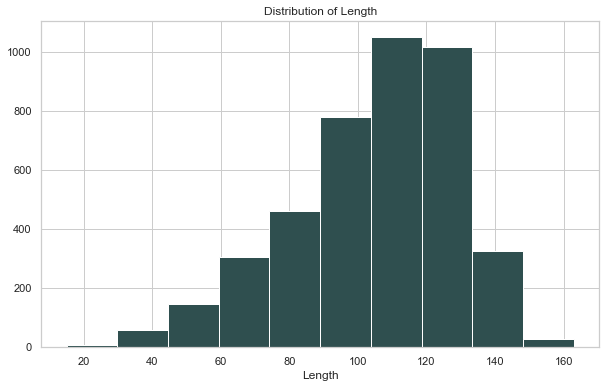

In [14]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Length, color="darkslategray")
axes.set_title("Distribution of Length")
axes.set_xlabel("Length")

plt.show()
plt.close()

We see that the distribution of `Length` is skewed to the left just as we expected it to be.

### Diameter

The diameter is the width of the shell, perpendicular to its length, that is meaured in mm.

The value of `Diameter` must be greater than zero (since it is a measurement in mm) and the maximum value should not be greater than ~300 mm (which is the measurement of the largest abalone shell diameter).

Let's look at the summary statistics for `Diameter` to make sure that our min and max fall within ranges that we would expect. 

In [15]:
df.Diameter.describe()

count    4177.000000
mean       81.576251
std        19.847973
min        11.000000
25%        70.000000
50%        85.000000
75%        96.000000
max       130.000000
Name: Diameter, dtype: float64

We see that our minimum of 11 mm is greater than 0 and the maximum value of 130 mm is also a value that we would expect. So, both of these values make sense within the context of our data.

Similar to `Length`, we see that our median is again greater than our mean, so we expect the distribution of `Diameter` to be skewed to the left.

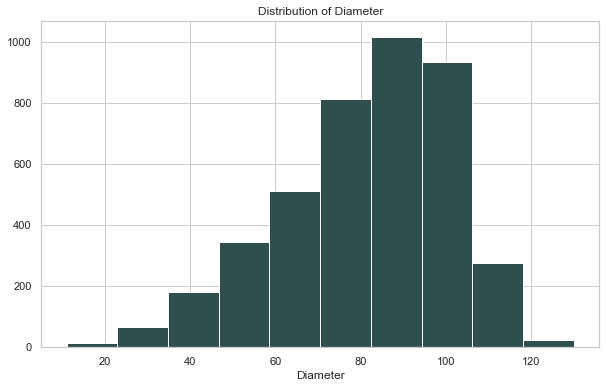

In [16]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Diameter, color="darkslategray")
axes.set_title("Distribution of Diameter")
axes.set_xlabel("Diameter")

plt.show()
plt.close()

Like we expected, the distribution of `Diameter` is skewed to the left.

### Height

The height is the measurement of the whole abolone with meat in its shell (in mm).

The minimum value of `Height` must be greater than zero while the maximum value should not be much greater than ~100 mm.

Let's look at the summary statistics for `Height` and make sure that both our minimum and maximum values are values that make sense within the context of our data.

In [17]:
df.Height.describe()

count    4177.000000
mean       27.903280
std         8.365411
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max       226.000000
Name: Height, dtype: float64

We see that our maximum value is 226 mm. This seems to be especially large considering our maximum `Length` is 163 mm. Let's take a look at the distribution to have another look.

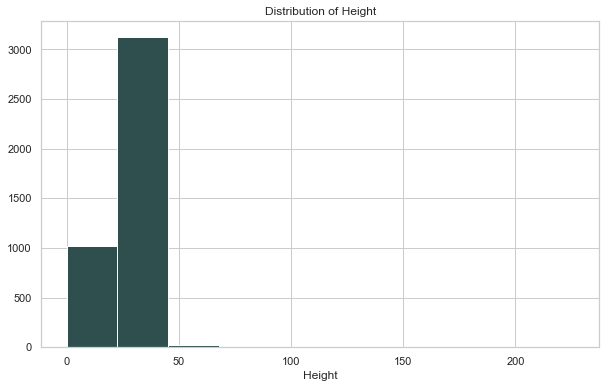

In [18]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Height, color="darkslategray")
axes.set_title("Distribution of Height")
axes.set_xlabel("Height")

plt.show()
plt.close()

From the distribution, it appears that this value has been entered incorrectly. 

Let's remove this entry from the dataset.

In [19]:
df = df[df['Height'] != 226]
len(df)

4176

Now, we have $4,176$ rows in our data frame.

Let's rerun the descriptive statistics and the histogram.

In [20]:
df.Height.describe()

count    4176.000000
mean       27.855843
std         7.784296
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max       103.000000
Name: Height, dtype: float64

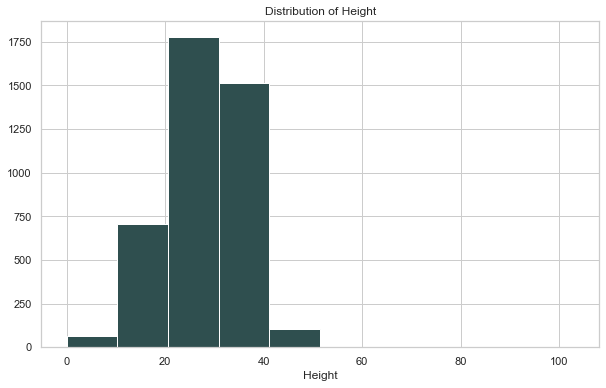

In [21]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Height, color="darkslategray")
axes.set_title("Distribution of Height")
axes.set_xlabel("Height")

plt.show()
plt.close()

We still see that the maximum value is 103 mm and this value is also a significant outlier that is shown in our plot of the distribution of `Height`.

So, let's remove this row from the dataframe as well.

In [22]:
df = df[df['Height'] != 103]
len(df)

4175

We have removed this row from the dataset. Let's rerun the descriptive statistics and the histogram yet another time.

In [23]:
df.Height.describe()

count    4175.000000
mean       27.837844
std         7.697834
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        50.000000
Name: Height, dtype: float64

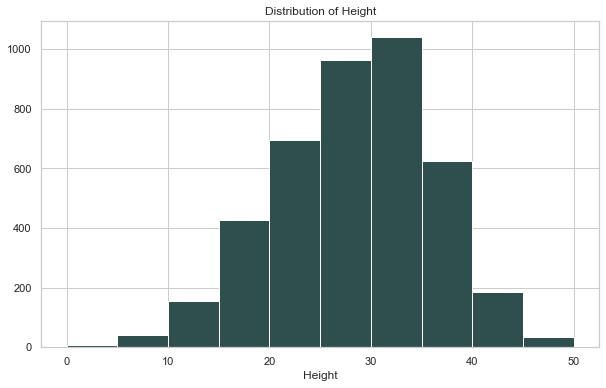

In [24]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Height, color="darkslategray")
axes.set_title("Distribution of Height")
axes.set_xlabel("Height")

plt.show()
plt.close()

Now, it appears that we have removed the visually identifiable outliers from the data frame.

The distribution of `Height` appears to still be skewed to the left.

### Whole Weight

The whole weight is the weight of the whole abolone in grams.

Let's view the descriptive statistics.

The minimum value of `Whole_weight` must be greater than zero.

In [25]:
df.Whole_weight.describe()

count    4175.000000
mean      165.693509
std        98.005358
min         0.400000
25%        88.300000
50%       159.900000
75%       230.600000
max       565.100000
Name: Whole_weight, dtype: float64

We see that we have a mimum value of $0.4000$ which is in fact greater than zero.

Now, let's take a look at the distribution of `Whole_weight`.

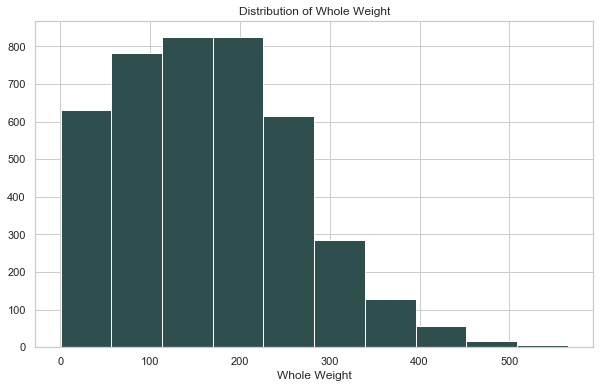

In [26]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Whole_weight, color="darkslategray")
axes.set_title("Distribution of Whole Weight")
axes.set_xlabel("Whole Weight")

plt.show()
plt.close()

The distribution of `Whole_weight` is skewed to the right.

### Shucked Weight

The shucked weight is the weight of the meat (in grams).

Let's view the descriptive statistics for `Shucked_weight`.

The minimum value should be greater than zero.

In [27]:
df.Shucked_weight.describe()

count    4175.000000
mean       71.838970
std        44.342691
min         0.200000
25%        37.200000
50%        67.200000
75%       100.350000
max       297.600000
Name: Shucked_weight, dtype: float64

The minimum value is greater than zero. We also notice that the maximum value is less than the maximum value of `Whole_weight` which is consistent with our knowledge of Shucked weight.

View the distribution of `Shucked_weight`.

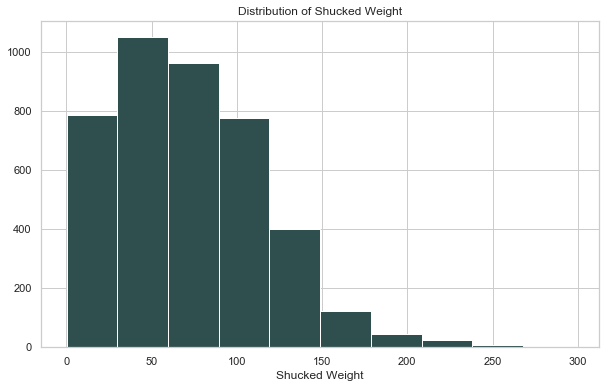

In [28]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Shucked_weight, color="darkslategray")
axes.set_title("Distribution of Shucked Weight")
axes.set_xlabel("Shucked Weight")

plt.show()
plt.close()

The distribution is skewed to the right.

### Viscera Weight

The viscera weight is the gut weight (after bleeding), and it is measured in grams.

Let's view the descriptive statistics for `Viscera_weight`.

Again, the minimum value should be greater than zero and the maximum value should be less than the maximum value of `Shucked_weight`.

In [29]:
df.Viscera_weight.describe()

count    4175.000000
mean       36.107162
std        21.906728
min         0.100000
25%        18.650000
50%        34.200000
75%        50.550000
max       152.000000
Name: Viscera_weight, dtype: float64

The minimum and maximum values are both within ranges that we would expect, given the acceptable range of the values outlined above.

Now, let's view the distribution of `Viscera_weight`.

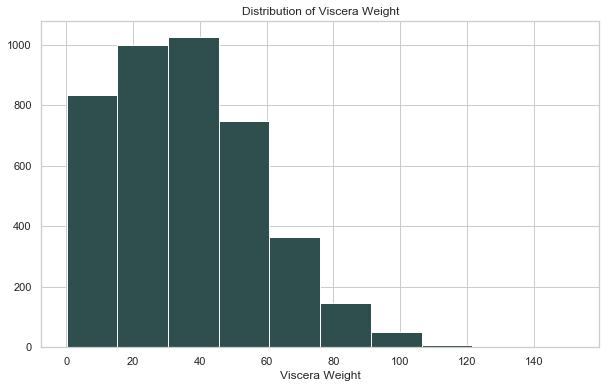

In [30]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Viscera_weight, color="darkslategray")
axes.set_title("Distribution of Viscera Weight")
axes.set_xlabel("Viscera Weight")

plt.show()
plt.close()

Similar to the other weight distributions, since it also has a mimum value close to zero (with no zero being negative of course) it also has a skewed right distribution.

### Shell Weight

The shell weight is the weight of the shell (in grams) after it has been dried.

View the descriptive statistics for `Shell_weight`.

The minimum value should be greater than zero and the maximum value should be significantly less than the maximum of the `Whole_weight` and also less than `Shucked_weight`.

In [31]:
df.Shell_weight.describe()

count    4175.000000
mean       47.758132
std        27.832449
min         0.300000
25%        26.000000
50%        46.800000
75%        65.750000
max       201.000000
Name: Shell_weight, dtype: float64

These values are consistent with what we would expect.

Now view the distribution.

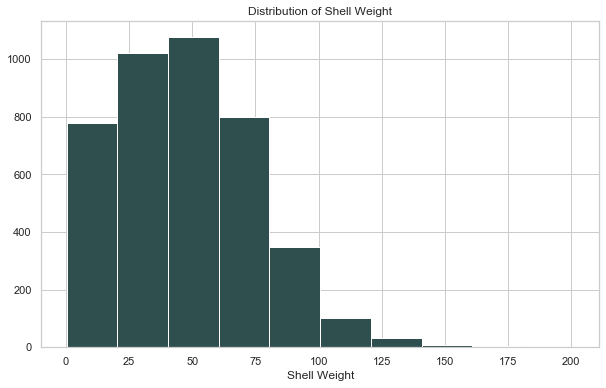

In [32]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Shell_weight, color="darkslategray")
axes.set_title("Distribution of Shell Weight")
axes.set_xlabel("Shell Weight")

plt.show()
plt.close()

Again, this distribution is skewed to the right.

### Rings

The number of rings is an integer count of the rings on the shell of the abalone. `Age` can later be calculated from `Rings` by adding $1.5$.

View the descriptive statistics for `Rings`.

We would expect the minimum value to likely be 1 (although it wouldn't necessarily have to be) and the maximum value to be less than 13 (which is the upper end of life expectancies for certain types of abalone).

In [33]:
df.Rings.describe()

count    4175.000000
mean        9.934132
std         3.224802
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

The mimimum is indeed $1$, but the maximum value is $29$. This sounds like a possible data entry error, so let's look at the distribution to see. 

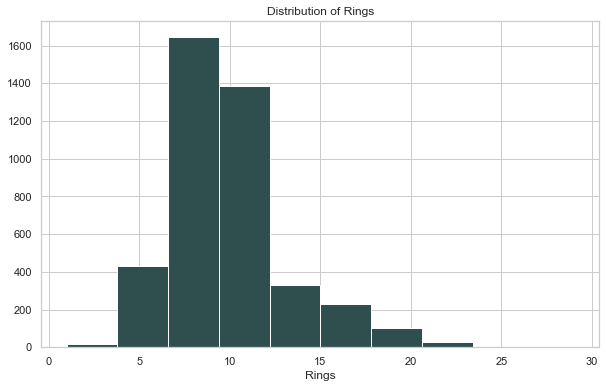

In [34]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Rings, color="darkslategray")
axes.set_title("Distribution of Rings")
axes.set_xlabel("Rings")

plt.show()
plt.close()

While this maximum value of $29$ is definitely an outlier in this data, it is not obscure enough (without a test for outliers) to completely remove the value at this time.

## Pairwise Comparisons

Next, we will explore some pairwise comparisons.

### Length vs Sex

From what we now about abalones, it would make sense that there is a difference in `Length` between the different sexes. In particular, there should be a distinct different between Infants and Males/Females.

Let's look at the descriptive statistics and grouped histograms to see if this is the case.

In [35]:
## Code comes from Lab 5 Solution
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [36]:
describe_by_category(df, "Length", "Sex", transpose=True)

Sex              F            I            M
count  1306.000000  1342.000000  1527.000000
mean    115.837672    85.549180   112.259332
std      17.224806    21.771545    20.533023
min      55.000000    15.000000    31.000000
25%     105.000000    72.000000   101.000000
50%     118.000000    87.000000   116.000000
75%     128.000000   102.000000   126.000000
max     163.000000   145.000000   156.000000


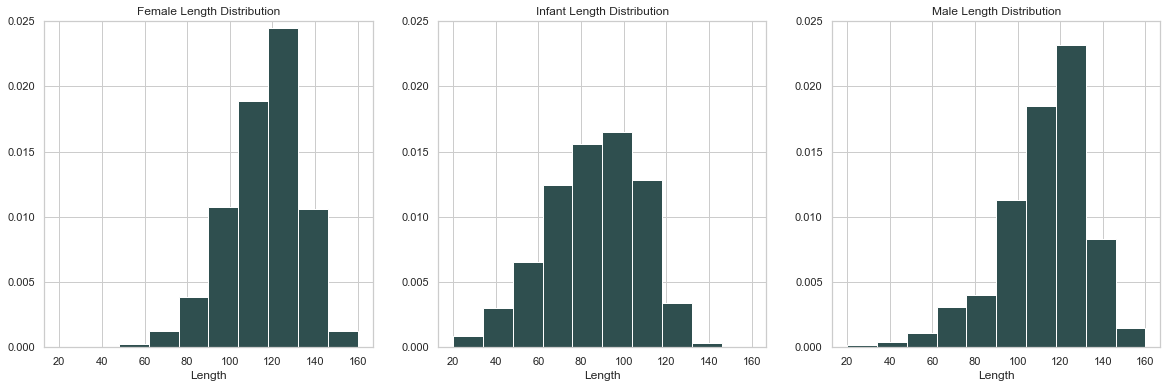

In [37]:
grouped = df.groupby("Sex")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["Length"].get_group("F"),range=[20,160],color="darkslategray",density=True)
axes.set_title("Female Length Distribution")
axes.set_xlabel("Length")
axes.set_ylim((0,0.025))

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["Length"].get_group("I"),range=[20,160],color="darkslategray",density=True)
axes.set_title("Infant Length Distribution")
axes.set_xlabel("Length")
axes.set_ylim((0,0.025))

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["Length"].get_group("M"),range=[20,160],color="darkslategray",density=True)
axes.set_title("Male Length Distribution")
axes.set_xlabel("Length")
axes.set_ylim((0,0.025))

plt.show()
plt.close()

We can see that the distributions of females and males appear to be very similar while the infant distribution is different from the other two; the infant distribution contains the smallest lengths (which makes sense) and does not have as many larger lengths.

### Whole Weight vs Shell Weight

From what we can understand about the relationship between the different measurements of weights in this dataset, we can expect that there is a linear relationship between `Whole_weight` and `Shell_weight`.

Let's take a look at the scatterplot of these two variables to see if this is the case. 

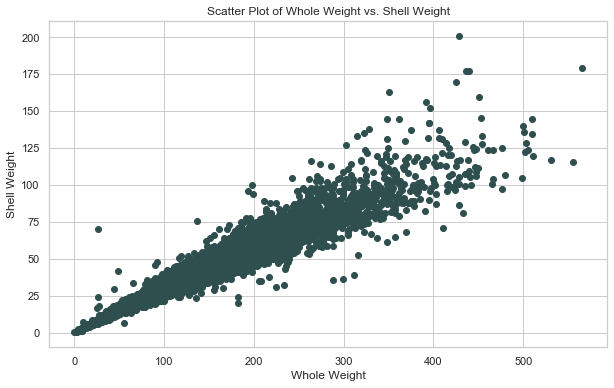

In [38]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Whole_weight, df.Shell_weight, marker="o", color="darkslategray")

axes.set_ylabel("Shell Weight")
axes.set_xlabel("Whole Weight")
axes.set_title("Scatter Plot of Whole Weight vs. Shell Weight")

plt.show()
plt.close()

We see that there is indeed a linear relationship between `Whole_weight` and `Shell_weight`. Let's also take a look at the correlation coefficients. I expect that since we can see that since the relationship is a very strong, positive linear relationship, that $r$ is going to be greater than $0.95$.

In [39]:
print("r = ", stats.pearsonr( df.Whole_weight, df.Shell_weight)[0])
print("rho = ", stats.spearmanr( df.Whole_weight, df.Shell_weight)[0])

r =  0.9553849632069378
rho =  0.9694102840369924


After performing the calculations, we see that $r = 0.955$ which is greater than the predicted value of $0.95$. So, we know that there is a very strong, positive linear relationship between `Whole_weight` and `Shell_weight`. The value of $\rho$ is slightly greater than the value of $r$, but there is not a great difference.

### Sex vs Height

Let's explore the relationship between `Sex` and `Height`. Similar to other comparisons, we expect the distribution of Infants to be different from that of Females and Males.

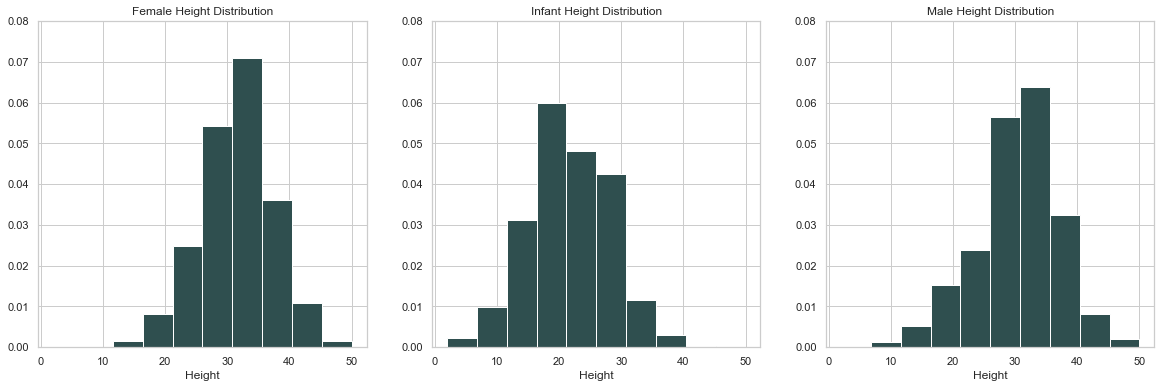

In [40]:
grouped = df.groupby("Sex")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["Height"].get_group("F"),range=[2,50],color="darkslategray",density=True)
axes.set_title("Female Height Distribution")
axes.set_xlabel("Height")
axes.set_ylim((0,0.08))

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["Height"].get_group("I"),range=[2,50],color="darkslategray",density=True)
axes.set_title("Infant Height Distribution")
axes.set_xlabel("Height")
axes.set_ylim((0,0.08))

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["Height"].get_group("M"),range=[2,50],color="darkslategray",density=True)
axes.set_title("Male Height Distribution")
axes.set_xlabel("Height")
axes.set_ylim((0,0.08))

plt.show()
plt.close()

We can see that the Infant height distribution is shifted to the left compared to the other two distributions so that it does contain the majority of the smaller heights in the dataset. We also see that the Infant distribution appears to be skewed to the right while the female and male distributions appear to be skewed to the left.

### Height vs Diameter

Two of the more apparently skewed distributions explored above were `Height` and `Diameter`. The skewness in these distributions could possibly be explained by `Sex` as well. We will first plot Height vs Diameter and then add Sex to the plot in color.

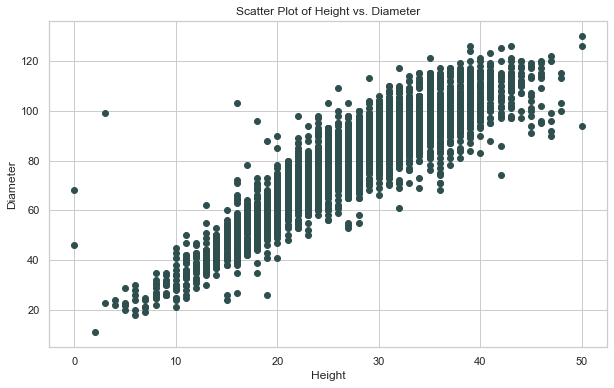

In [41]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Height, df.Diameter, marker="o", color="darkslategray")

axes.set_ylabel("Diameter")
axes.set_xlabel("Height")
axes.set_title("Scatter Plot of Height vs. Diameter")

plt.show()
plt.close()

Now, let's also show `Sex` by splitting this single scatterplot into three scatterplots, one for each sex.

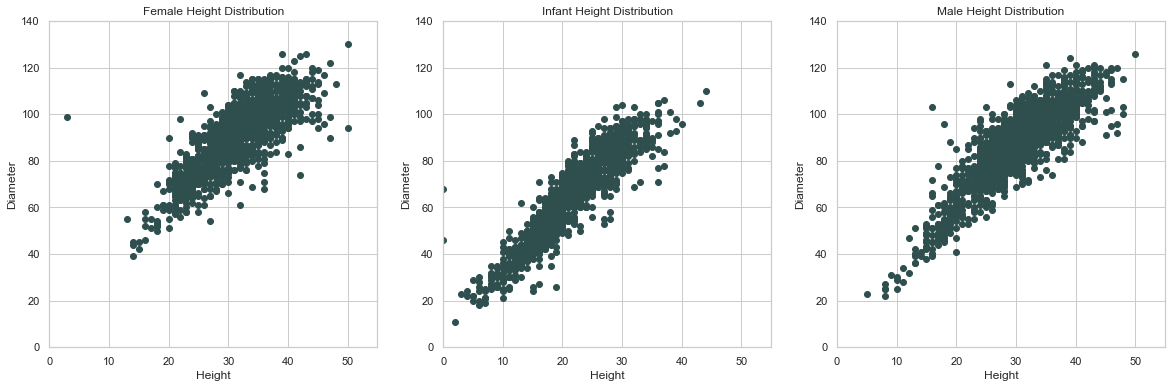

In [42]:
grouped = df.groupby("Sex")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.scatter(grouped["Height"].get_group("F"),grouped["Diameter"].get_group("F"),color="darkslategray")
axes.set_title("Female Height Distribution")
axes.set_xlabel("Height")
axes.set_ylabel("Diameter")
axes.set_xlim((0,55))
axes.set_ylim((0,140))

axes = figure.add_subplot(1, 3, 2)
axes.scatter(grouped["Height"].get_group("I"),grouped["Diameter"].get_group("I"),color="darkslategray")
axes.set_title("Infant Height Distribution")
axes.set_xlabel("Height")
axes.set_ylabel("Diameter")
axes.set_xlim((0,55))
axes.set_ylim((0,140))

axes = figure.add_subplot(1, 3, 3)
axes.scatter(grouped["Height"].get_group("M"),grouped["Diameter"].get_group("M"),color="darkslategray")
axes.set_title("Male Height Distribution")
axes.set_xlabel("Height")
axes.set_ylabel("Diameter")
axes.set_xlim((0,55))
axes.set_ylim((0,140))

plt.show()
plt.close()

We notice that even though the individual distributions of `Height` and `Diameter` were skewed, creating a scatterplot of both have them plotted together shows a strong, positive, linear relationship for all three sexes. Infant appears to have the tightest and therefore strongest positive linear relationship, and it also has the "smallest" values in the chart. 

We also see that there are a number of males that have some "smaller" values compared to the female distribution which doesn't extend as far. Perhaps it is possible to classify males earlier than it is possible to classify females.  In other words, more of the infants could be females that were unable to be classified yet (when their male counterparts were able to be classified as males). 

## Correlation: Rings v. ?

From our preliminary analysis of `Rings`, we noticed that the distribution has a right skew and the two tails of the distribution have an interesting shape. Our question here is if we can identify subgroups using the other variables to better represent `Rings`.

We will start by doing a pairwise comparison between Rings and each of the other variables in the dataset.


### Rings vs Sex

We know that there are 3 different classifications of `Sex` in this dataset: Female (F), Infant (I), and Male (M). Since infants are really a classification of age and rings are used to determine age of abalone, then we know that any abalone classified as I are going to likely have less rings than abalone classified as F or M. So, the group of infant abalone may explain the entries with a smaller number of rings. 

Perhaps the distribution of `Rings` is explained by sex: infants have less rings than males or females.

In [43]:
describe_by_category(df, "Rings", "Sex", transpose=True)

Sex              F            I            M
count  1306.000000  1342.000000  1527.000000
mean     11.131700     7.890462    10.705959
std       3.104236     2.511554     3.027287
min       5.000000     1.000000     3.000000
25%       9.000000     6.000000     9.000000
50%      10.000000     8.000000    10.000000
75%      12.000000     9.000000    12.000000
max      29.000000    21.000000    27.000000


The summary statistics show that the mean number of rings for I appears to be less than F or M. It is difficult to determine a difference between F and M from the summary statistics alone.

Let's look at histograms:

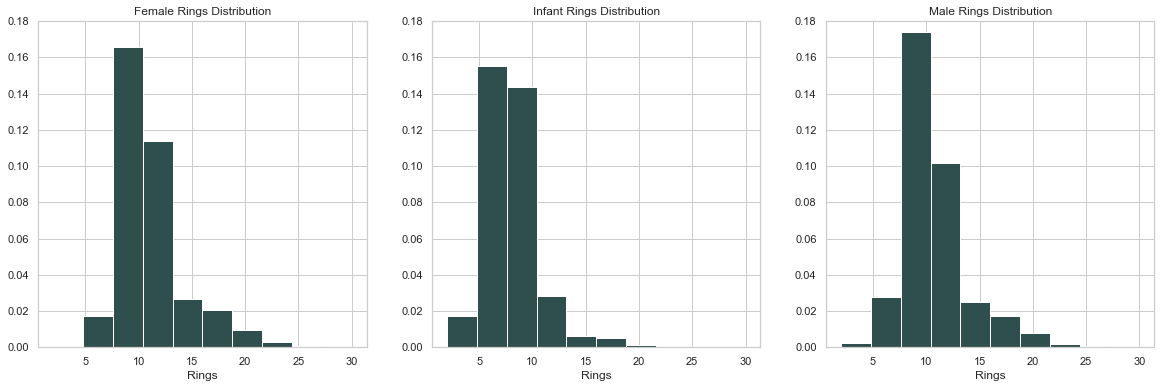

In [44]:
grouped = df.groupby("Sex")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["Rings"].get_group("F"),range=[2,30],color="darkslategray",density=True)
axes.set_title("Female Rings Distribution")
axes.set_xlabel("Rings")
axes.set_ylim((0,0.18))

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["Rings"].get_group("I"),range=[2,30],color="darkslategray",density=True)
axes.set_title("Infant Rings Distribution")
axes.set_xlabel("Rings")
axes.set_ylim((0,0.18))

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["Rings"].get_group("M"),range=[2,30],color="darkslategray",density=True)
axes.set_title("Male Rings Distribution")
axes.set_xlabel("Rings")
axes.set_ylim((0,0.18))

plt.show()
plt.close()

From the histograms, we also see that infants appear to have less rings than females or males. The females and males appear to have very similar distributions of number of rings. 

### Rings vs Length

`Length` seems like it would be an explanatory variable of `Rings`. The more rings it has (and therefore, the older an abalone gets), the more its length would also increase.

Let's look at the correlation coefficients:

In [45]:
print("r = ", stats.pearsonr( df.Rings, df.Length)[0])
print("rho = ", stats.spearmanr( df.Rings, df.Length)[0])

r =  0.5568271869030634
rho =  0.6043556329661621


The value of Pearson's Coefficient is, $r$, is $0.557$ which indicates that there is at least some positive linear relationship between `Length` and `Rings`. Spearman's is maybe even more interesting, since $\rho = 0.604$ is slightly greater than our value of $r$. This indicates that there is modest monotonic relationship that is not necessarily linear.

Now, let's plot the data:

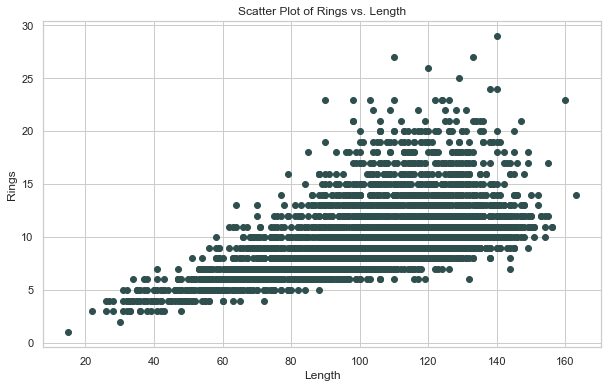

In [46]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Length, df.Rings, marker="o", color="darkslategray")

axes.set_ylabel("Rings")
axes.set_xlabel("Length")
axes.set_title("Scatter Plot of Rings vs. Length")

plt.show()
plt.close()

From the scatter plot, it appears that as the length of a shell increases, the variability of the number of rings also increases. We can also see the general positive relationship between length and rings. Maybe looking at the intersection of Length/Rings/Sex (or another 3rd variable) would be a better candidate and explain more of the variability as length increases.

### Rings vs Diameter

Similar to Length, `Diameter` also seems like it would be an explanatory variable of `Rings`. The older the abalone is and the more rings it has, the larger its diameter would be.

Let's look at the correlation coefficients:

In [47]:
print("r = ", stats.pearsonr( df.Rings, df.Diameter)[0])
print("rho = ", stats.spearmanr( df.Rings, df.Diameter)[0])

r =  0.5747924388570658
rho =  0.622885258679689


The value of Pearson's Coefficient is, $r$, is $0.575$ which indicates that there is a moderate, positive linear relationship between `Diameter` and `Rings`. Spearman's is maybe even more interesting, since $\rho = 0.623$ is slightly greater than our value of $r$. This indicates that there is moderate monotonic relationship that is not necessarily linear that is stronger than the linear relationship described by $r$.


Now, let's look at the scatter plot:

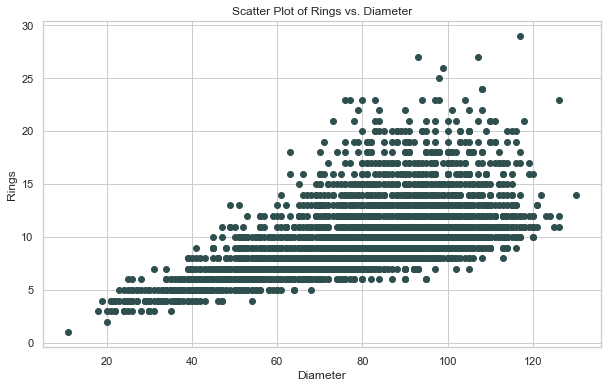

In [48]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Diameter, df.Rings, marker="o", color="darkslategray")

axes.set_ylabel("Rings")
axes.set_xlabel("Diameter")
axes.set_title("Scatter Plot of Rings vs. Diameter")

plt.show()
plt.close()

This scatterplot is very similar to that of `Length` in the previous section. As the Diameter increases, the variability in the number of rings also increases. We can again see that there is a positive relationship between Diameter and Rings.

### Rings vs Height

`Height` also seems like it would be an explanatory variable of `Rings`. The older the abalone is and the more rings it has, the greater its height would be.

Let's look at the correlation coefficients:

In [49]:
print("r = ", stats.pearsonr( df.Rings, df.Height)[0])
print("rho = ", stats.spearmanr( df.Rings, df.Height)[0])

r =  0.6096337419468176
rho =  0.6584515715587044


The value of Pearson's Coefficient is, $r$, is $0.610$ which indicates that there is a moderate, positive linear relationship between `Height` and `Rings`. Spearman's is maybe even more interesting, since $\rho = 0.658$ is greater than our value of $r$. This indicates that there is moderate monotonic relationship that is not necessarily linear that is stronger than the linear relationship described by $r$.


Now, let's look at the scatter plot:

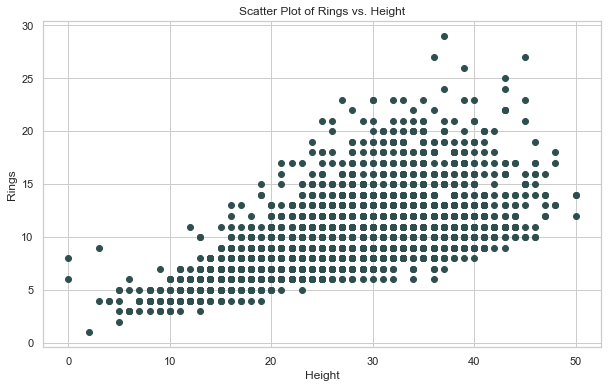

In [50]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Height, df.Rings, marker="o", color="darkslategray")

axes.set_ylabel("Rings")
axes.set_xlabel("Height")
axes.set_title("Scatter Plot of Rings vs. Height")

plt.show()
plt.close()

As the `Height` increases, the variability in the number of rings also increases. There is a positive relationship between Height and Rings. In fact, this is the strongest linear relationship we have seen so far. We do notice again that since Spearman's coefficient has a higher value than Pearson's Coefficient, we may be able to find another model that fits the scatterplot better than the linear model.

### Rings vs Whole_weight

`Whole_weight` also seems like it would be an explanatory variable of `Rings`. The older the abalone is and the more rings it has, the greater its whole weight would be.

Let's look at the correlation coefficients:

In [51]:
print("r = ", stats.pearsonr( df.Rings, df.Whole_weight)[0])
print("rho = ", stats.spearmanr( df.Rings, df.Whole_weight)[0])

r =  0.5408593814767906
rho =  0.6308818148280926


The value of Pearson's Coefficient is, $r$, is $0.541$ which indicates that there is a moderate, positive linear relationship between `Whole_weight` and `Rings`. Spearman's is maybe even more interesting, since $\rho = 0.631$ is noticeably greater than our value of $r$. This indicates that there is moderate monotonic relationship that is not necessarily linear that is stronger than the linear relationship described by $r$.


Now, let's look at the scatter plot

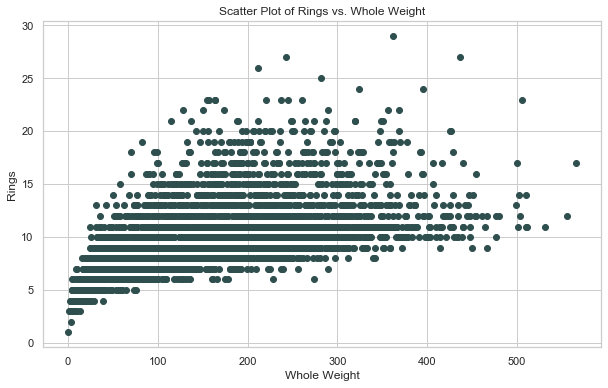

In [52]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Whole_weight, df.Rings, marker="o", color="darkslategray")

axes.set_ylabel("Rings")
axes.set_xlabel("Whole Weight")
axes.set_title("Scatter Plot of Rings vs. Whole Weight")

plt.show()
plt.close()

We see a shift in the shape of the distribution of `Whole_weight` vs `Rings` in the scatterplot above; there is more of a curve in this distribution which is recognized more in Spearman's Coefficient $\rho$. There is a greater difference between $r$ and $\rho$ in this comparison compared to the previous ones.

### Rings vs Shucked_weight

`Shucked_weight` also seems like it would be an explanatory variable of `Rings`. The older the abalone is and the more rings it has, the greater its shucked weight would be.

Let's look at the correlation coefficients:

In [53]:
print("r = ", stats.pearsonr( df.Rings, df.Shucked_weight)[0])
print("rho = ", stats.spearmanr( df.Rings, df.Shucked_weight)[0])

r =  0.42144214389551016
rho =  0.5395250936782083


The value of Pearson's Coefficient is, $r$, is $0.421$ which indicates that there is not a very strong linear relationship between `Shucked_weight` and `Rings`. Spearman shows more of a relationship, since $\rho = 0.540$ is greater than our value of $r$. This indicates that there is moderate monotonic relationship that is not necessarily linear that is stronger than the linear relationship described by $r$.


Now, let's look at the scatter plot

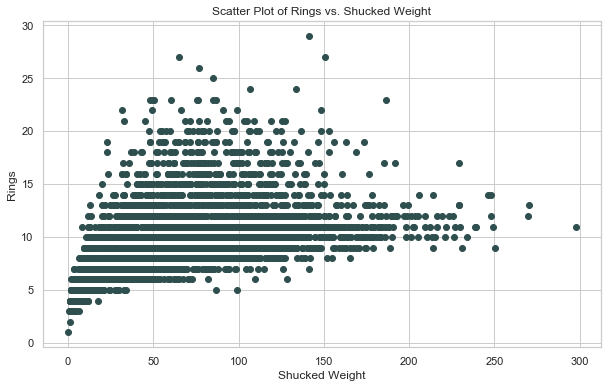

In [54]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Shucked_weight, df.Rings, marker="o", color="darkslategray")

axes.set_ylabel("Rings")
axes.set_xlabel("Shucked Weight")
axes.set_title("Scatter Plot of Rings vs. Shucked Weight")

plt.show()
plt.close()

This scatterplot appears to be very similar to the previous one; however, the range of `Shucked_weight` is smaller than that of `Whole_weight` while the spread of the distribution is fairly similar. This is reflected in the correlation coefficient above which are both smaller than those given between Whole Weight and Rings.  

### Rings vs Viscera_weight

`Viscera_weight` also seems like it would be an explanatory variable of `Rings`. The older the abalone is and the more rings it has, the greater its viscera weight would be.

Let's look at the correlation coefficients:

In [55]:
print("r = ", stats.pearsonr( df.Rings, df.Viscera_weight)[0])
print("rho = ", stats.spearmanr( df.Rings, df.Viscera_weight)[0])

r =  0.5042341475348568
rho =  0.6143562050720611


The value of Pearson's Coefficient is, $r$, is $0.504$ which indicates that there is a modest, positive linear relationship between `Viscera_weight` and `Rings`. Spearman's is maybe even more interesting, since $\rho = 0.614$ is greater than our value of $r$. This indicates that there is moderate monotonic relationship that is not necessarily linear that is stronger than the linear relationship described by $r$.


Now, let's look at the scatter plot

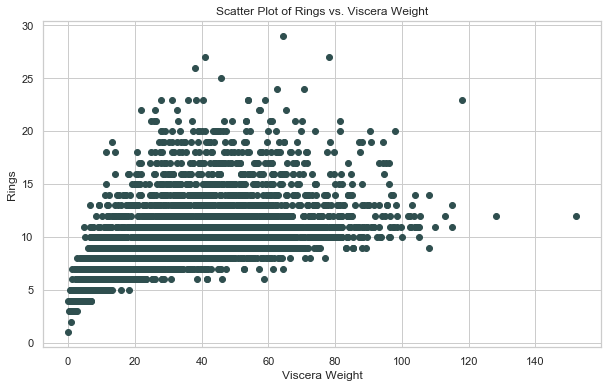

In [56]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Viscera_weight, df.Rings, marker="o", color="darkslategray")

axes.set_ylabel("Rings")
axes.set_xlabel("Viscera Weight")
axes.set_title("Scatter Plot of Rings vs. Viscera Weight")

plt.show()
plt.close()

Again, this scatterplot has a similar shape to the previous two comparisons. There is a larger difference between $r$ and $\rho$ which is supported by the scatterplot; it appears that a linear model is not the best fit for this correlation. 

### Rings vs Shell_weight

`Shell_weight` also seems like it would be an explanatory variable of `Rings`. The older the abalone is and the more rings it has, the greater its shell weight would be.

Let's look at the correlation coefficients:

In [57]:
print("r = ", stats.pearsonr( df.Rings, df.Shell_weight)[0])
print("rho = ", stats.spearmanr( df.Rings, df.Shell_weight)[0])

r =  0.6278154368416846
rho =  0.6925015743181671


The value of Pearson's Coefficient is, $r$, is $0.628$ which indicates that there is a moderate, positive linear relationship between `Shell_weight` and `Rings`. Spearman's coefficient has a value of $\rho = 0.693$. This indicates that there is moderate monotonic relationship that is not necessarily linear that is stronger than the linear relationship described by $r$.


Now, let's look at the scatter plot

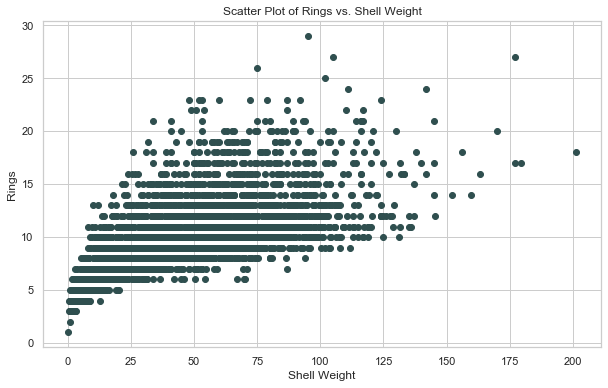

In [58]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.Shell_weight, df.Rings, marker="o", color="darkslategray")

axes.set_ylabel("Rings")
axes.set_xlabel("Shell Weight")
axes.set_title("Scatter Plot of Rings vs. Shell Weight")

plt.show()
plt.close()

This scatterplot and correlation coefficients show the strongest correlations between `Shell_weight` and `Rings` compared to any of the other variables.

## 1.4 Statistical and Mathematical Modeling

### Height

From our single variable analysis in EDA, it appears that `Height` may be able to be modeled using a normal distribution.

Let's begin by creating a histogram of `Height` where we will increase the number of bins and also include the normal distribution with the correct model parameters.

In [59]:
import numpy as np
from scipy.stats import norm

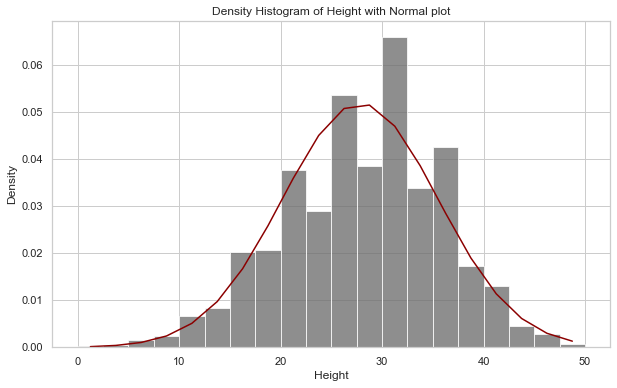

In [60]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(df[ "Height"], color="DimGray", density=True,bins=20, alpha=0.75)
axes.set_xlabel( "Height")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of Height with Normal plot")
xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]
mean = np.mean(df["Height"])
std = np.std(df["Height"])
ys = [norm.pdf( k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

From the chart, we see that in general the normal distribution may be a good model for `Height`. It does not extremely underestimate or overestimate extreme heights.

It is also suggested to look at the CDF, so we will plot this next.

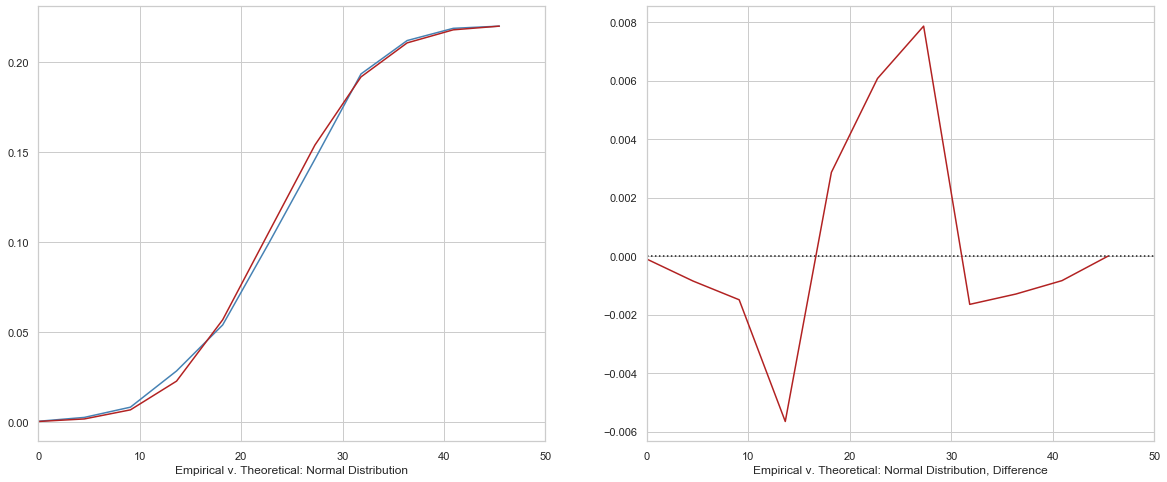

In [61]:
figure = plt.figure(figsize=(20, 8))

mn = np.min(df["Height"])
mx = np.max(df["Height"])
mean = np.mean( df[ "Height"])
std = np.std( df[ "Height"])

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram(df[ "Height"], bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot(base[:-1], cumulative, color="steelblue")
axes.set_xlim((mn, mx))
sampled_data = [mean + r * std for r in np.random.standard_normal(10000)]
values2, base = np.histogram(sampled_data, bins=base, density=True)
cumulative2 = np.cumsum(values2)

axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((np.min( df[ "Height"]), np.max( df[ "Height"])))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")

axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot(base[:-1], differences, color='firebrick')
axes.set_xlim((mn, mx))
axes.hlines(0, 0, 14000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")

plt.show()
plt.close()

We have plotted the difference between the Empirical and Theoretical Normal Distributions since ultimately, we are looking to see the differences between the two. We can see from the first chart that the two CDFs appear to match up extremely well. However, their differences are highlighted in the second chart.

Next, we will plot the empirical quantiles against the theoretical quantiles. If the normal distribution is a good match for `Height`, then our results should follow the line $y = x$.  

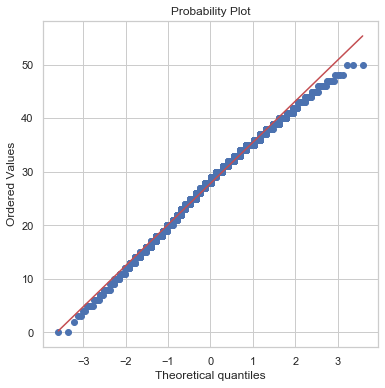

In [62]:
figure = plt.figure(figsize=(6, 6))

axes = figure.add_subplot(1, 1, 1)
stats.probplot(df[ "Height"], dist="norm", plot=axes)

plt.show()
plt.close()

We see that overall, the scatter plot appears to fit to the line, $y = x$. This tells us that a normal distribution is a good model for our data.

Now, let's use this distribution to answer some questions:

1. What is the probability that an abalone has a height greater than 35  mm?

In [63]:
stats.norm.sf(35,mean,std)

0.17605009916584374

There is a $17.605 \%$ chance that an abalone has a height greater than 35 mm.

2. What is the probability that an abalone has a height less than 18 mm ?

In [64]:
stats.norm.cdf(18,mean,std)

0.10059742915529851

There is a $10.060 \%$ chance that an abalone has a height less than 18 mm.

3. What is the probability that an abalone has a height between 22 mm and 38 mm?

In [65]:
stats.norm.cdf(38,mean,std) - stats.norm.cdf(22,mean,std)

0.6825448139281238

There is a $68.254 \%$ chance that an abalone has a height between 22 mm and 38 mm.

## Rings (target variable)

From our individual variable analysis above, it appears that `Rings` can be modeled using the Poisson Distribution. We can view our model parameter as "rings per abalone."

First, let's plot `Rings` with the Poisson Distributed plotted on top of it.

In [66]:
from scipy.stats import poisson

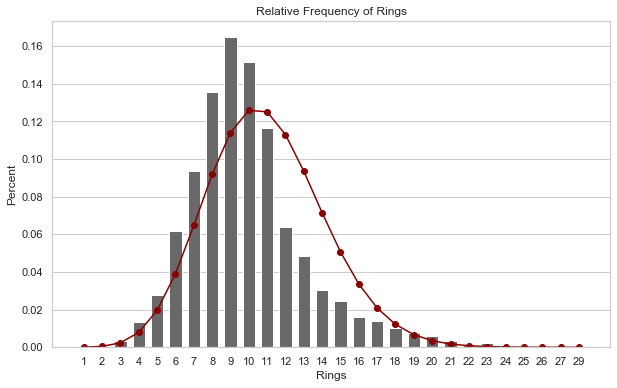

In [67]:
proportions = df["Rings"].value_counts(normalize=True).sort_index()
xs = range( len( proportions))
width = 1/1.5

lamb = np.mean(df["Rings"]) # m1
ys = [poisson.pmf( x, lamb, 0) for x in xs]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(xs, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Rings")
axes.set_xticks(xs)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Rings")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
axes.plot( xs, ys, color="darkred", marker="o")

plt.show()
plt.close()

We can see that the model underestimates values of `Ring` between 4 and 10 and overestimates values between 11 and 18. Overall, the shape of the distribution appears to fit, but it does not line up with the data particularly well.

In order to investigate this further, let's also take a look at the plot of the empirical quantiles against the theoretical quantiles. If the scatter plot appears to follow the line (or near the line) $y = x$, then the Poisson Distribution is a good model for our data.

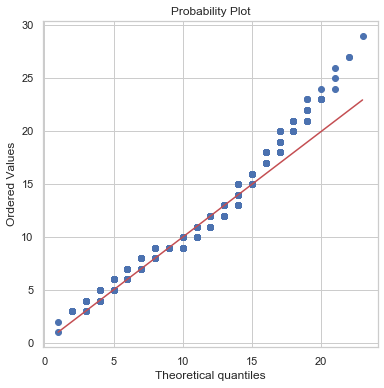

In [68]:
figure = plt.figure(figsize=(6, 6))

axes = figure.add_subplot(1, 1, 1)
stats.probplot(df[ "Rings"], dist="poisson", sparams = (lamb,), plot=axes)

plt.show()
plt.close()

From the scatter plot of empirical quantiles against the theoretical quantiles, we can see that the Poisson Distribution may model the data better than we originally thought. The plot follows the line $y = x$ fairly well. There is no significant curvature to the plot. We do note, however, that the scatter plot follows the line better for the smaller quantiles; so, these results will be more accurate, based on the data that we currently have. 

Based on this evidence, we can use the Poisson Distribution as a model for `Rings`.

Now, let's use the model to answer some questions:

1. What is the probability that an abalone has more than 8 rings? 

In [69]:
stats.poisson.sf(8,lamb)

0.6597149854861347

There is a $65.971 \%$ chance that an abalone has more than 8 rings.

2. What is the probability that an abalone has less than 10 rings?

In [70]:
stats.poisson.cdf(10,lamb)

0.591279933163011

There is a $59.128 \%$ chance that an abalone has less than 10 rings.

3. What is the probability that an abalone has between 14 and 16 rings?

In [71]:
stats.poisson.cdf(16,lamb) - stats.poisson.cdf(14,lamb)

0.05443299696192472

There is a $5.443 \%$ chance that an abalone has between 14 and 16 rings.

### Using the mean and median

The mean and the median use two different ways to choose a value of $x$ to predict. The mean is the predicted value of $x$ that minimizes total squared loss. In contrast, the median minimizes the absolute error, since it is the middle value.

Let's calculate the mean and median for our target variable, `Rings`.

In [72]:
mean = np.mean(df['Rings'])
median = np.median(df['Rings'])

print("Mean: ", mean)
print("Median: ", median)

Mean:  9.934131736526947
Median:  9.0


So, if we wanted to choose a value of $x$ to predict that minimizes our total squared loss, we would choose $x = mean = 9.934$. If we wanted to choose $x$ so as to minimize the absolute error, we would instead set $x = median = 9.0$.